In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Calibration import Calibration, Atmospheric_effects

import os

In [7]:
cold_file=np.fromfile(open(os.getcwd() + "/radio_tests/06_03/cold"), dtype=np.float32)
cold = cold_file[:len(cold_file)//2]
hot=np.fromfile(open(os.getcwd() + "/radio_tests/06_03/hot"), dtype=np.float32)
plane=np.fromfile(open(os.getcwd() + "/radio_tests/06_03/plane"), dtype=np.float32)
sun = np.fromfile(open(os.getcwd() + "/radio_tests/06_03/sun"), dtype=np.float32)

In [4]:
f=cold
Vector_length = int(2**13)
print(np.shape(f)[0]/Vector_length)


central_freq = 1420.405751768e6
# central_freq = 1420e6
Bandwidth = 6e6
frequency_spacing=Bandwidth/Vector_length
freq = (np.linspace((central_freq-Bandwidth/2), central_freq + Bandwidth/2 , Vector_length)/1e6) - central_freq/1e6
f = f[0:Vector_length]

2.0


In [5]:
def plot(f):
    f = f[0:Vector_length]
    fig,ax=plt.subplots(figsize=(10,5))
    ax.axvline(x=0/1e6, color='r', linestyle='--', label='test HI 21cm line')
    ax.step(freq,10**f,where='mid',label='Frequency Spectrum')
    ax.set_xlabel(r"Frequency ($\Delta \nu$) [MHz]")
    ax.set_ylabel("Amplitude")
    ax.set_title("Frequency Spectrum")
    ax.grid()
    ax.legend()

In [8]:
sum_shape_normalization = 10**hot/np.sum(10**hot)
max_shape_normalization = 10**hot/np.max(10**hot)
mean_shape_normalization = 10**hot/np.mean(10**hot)


Th=285
Tc=7

def Tsys(Y):
    return (Th-Tc*Y)/(Y-1)
Tsys_nu= Tsys(10**hot/10**cold)

print(np.mean(Tsys_nu))
print(np.std(Tsys_nu))

124.98349
23.013235


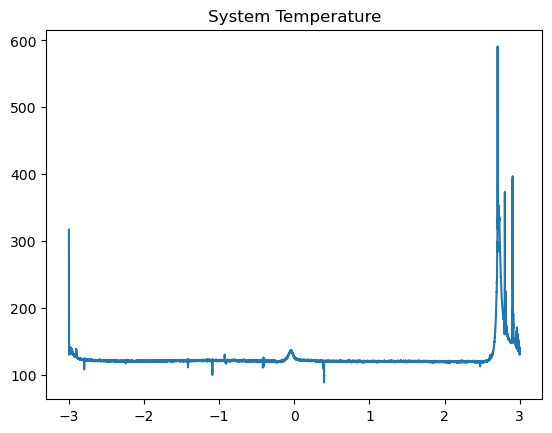

In [9]:
plt.title("System Temperature")

plt.plot(freq,Tsys_nu)
plt.show()

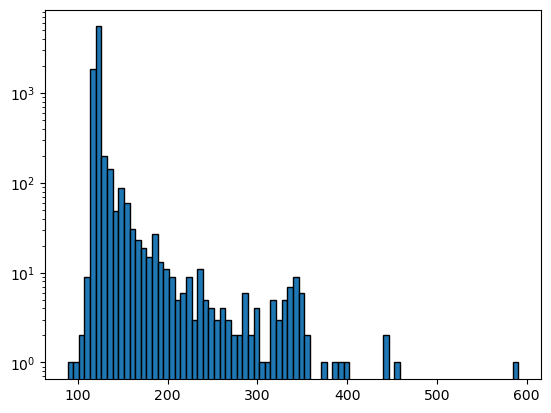

In [10]:
plt.hist(Tsys_nu, 80, ec="black")
#plt.xlim(50, 175)
plt.yscale("log")
plt.show()

In [11]:
def flat_field(data, shape_norm):
    return 10**data / shape_norm

In [9]:
hot_sum_shape_norm = flat_field(hot, sum_shape_normalization)
cold_sum_shape_norm = flat_field(cold, sum_shape_normalization)
measure_sum_shape_norm = flat_field(measure, sum_shape_normalization)

In [10]:
print(f"normalized hot\nmax: {np.max(hot_sum_shape_norm)}\nmin: {np.min(hot_sum_shape_norm)}\nrange: {np.max(hot_sum_shape_norm) - np.min(hot_sum_shape_norm)}\nmean: {np.mean(hot_sum_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_sum_shape_norm)}\nmin: {np.min(cold_sum_shape_norm)}\nrange: {np.max(cold_sum_shape_norm) - np.min(cold_sum_shape_norm)}\nmean: {np.mean(cold_sum_shape_norm)}")

normalized hot
max: 27181498368.0
min: 27181494272.0
range: 4096.0
mean: 27181494272.0

normalized cold
max: 14479836160.0
min: 7509911040.0
range: 6969925120.0
mean: 7917050368.0


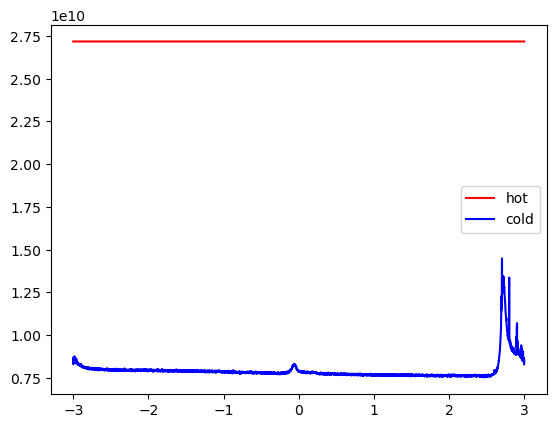

In [11]:
plt.plot(freq, hot_sum_shape_norm, "r-", label="hot")
plt.plot(freq, cold_sum_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [12]:
hot_max_shape_norm = flat_field(hot, max_shape_normalization)
cold_max_shape_norm = flat_field(cold, max_shape_normalization)
measure_max_shape_norm = flat_field(measure, max_shape_normalization)

In [13]:
print(f"normalized hot\nmax: {np.max(hot_max_shape_norm)}\nmin: {np.min(hot_max_shape_norm)}\nrange: {np.max(hot_max_shape_norm) - np.min(hot_max_shape_norm)}\nmean: {np.mean(hot_max_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_max_shape_norm)}\nmin: {np.min(cold_max_shape_norm)}\nrange: {np.max(cold_max_shape_norm) - np.min(cold_max_shape_norm)}\nmean: {np.mean(cold_max_shape_norm)}")

normalized hot
max: 7064928.5
min: 7064927.5
range: 1.0
mean: 7064928.0

normalized cold
max: 3763552.75
min: 1951952.125
range: 1811600.625
mean: 2057774.5


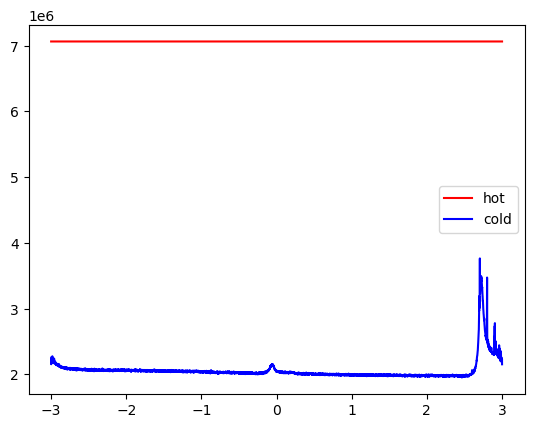

In [14]:
plt.plot(freq, hot_max_shape_norm, "r-", label="hot")
plt.plot(freq, cold_max_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [15]:
hot_mean_shape_norm = flat_field(hot, mean_shape_normalization)
cold_mean_shape_norm = flat_field(cold, mean_shape_normalization)
measure_mean_shape_norm = flat_field(measure, mean_shape_normalization)

print(f"normalized hot\nmax: {np.max(hot_mean_shape_norm)}\nmin: {np.min(hot_mean_shape_norm)}\nrange: {np.max(hot_mean_shape_norm) - np.min(hot_mean_shape_norm)}\nmean: {np.mean(hot_mean_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_mean_shape_norm)}\nmin: {np.min(cold_mean_shape_norm)}\nrange: {np.max(cold_mean_shape_norm) - np.min(cold_mean_shape_norm)}\nmean: {np.mean(cold_mean_shape_norm)}")

normalized hot
max: 3318054.0
min: 3318053.5
range: 0.5
mean: 3318053.5

normalized cold
max: 1767558.125
min: 916737.1875
range: 850820.9375
mean: 966436.8125


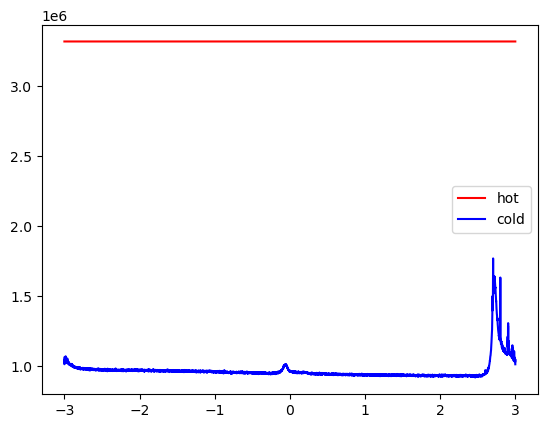

In [16]:
plt.plot(freq, hot_mean_shape_norm, "r-", label="hot")
plt.plot(freq, cold_mean_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [13]:
calibrate = Calibration(300, air_temperature=13)

cold_temp = calibrate.cold_temperature(30)
hot_temp = calibrate.hot_temperature(15+273)

print(f"T_cold: {cold_temp} K")
print(f"T_hot: {hot_temp} K")

y_factor = calibrate.Y_factor(10**hot, 10**cold)

tsys = calibrate.T_sys(10**hot, 10**cold)

tcal = calibrate.T_cal(10**plane, 10**hot, 10**cold)


plt.title("Calibrated galactic plane spectrum")

plt.plot(freq, tcal, "b-")

plt.xlim(-2, 2)

plt.show()

T_cold: 2.8548521612608146 K K
T_hot: 288.0 K K


AttributeError: 'Calibration' object has no attribute 'T_sys'